In [1]:
def calculate_decision(data):
    # 初始化结果列表
    results = []

    # 遍历每个场景数据
    for index, scenario in enumerate(data, 1):
        purchase_cost_p1, test_cost_p1, purchase_cost_p2, test_cost_p2, assembly_cost, test_cost_prod, market_price, exchange_loss, disassembly_cost = scenario

        # 重新设置缺陷率
        defect_rate_p1 = 0.1500  # 使用power_reject的稳定值
        defect_rate_p2 = 0.1500  # 同上
        defect_rate_prod = 0.0500  # 使用power_accept的稳定值

        min_cost = float('inf')
        best_decision = None
        
        # 决策组合
        for test_p1 in [True, False]:
            for test_p2 in [True, False]:
                for test_prod in [True, False]:
                    # 计算成本和收益
                    cost = purchase_cost_p1 + purchase_cost_p2 + assembly_cost
                    revenue = market_price

                    # 检测零配件1
                    if test_p1:
                        cost += test_cost_p1
                        if defect_rate_p1 > 0 and not test_prod:
                            cost += disassembly_cost + exchange_loss
                    # 检测零配件2
                    if test_p2:
                        cost += test_cost_p2
                        if defect_rate_p2 > 0 and not test_prod:
                            cost += disassembly_cost + exchange_loss
                    
                    # 检测成品
                    if test_prod:
                        cost += test_cost_prod
                        if defect_rate_prod > 0:
                            cost += defect_rate_prod * (disassembly_cost + exchange_loss)
                            revenue -= defect_rate_prod * exchange_loss
                    else:
                        cost += defect_rate_prod * (disassembly_cost + exchange_loss)
                        revenue -= defect_rate_prod * exchange_loss

                    # 计算净成本
                    net_cost = cost - revenue

                    # 更新最优决策
                    if net_cost < min_cost:
                        min_cost = net_cost
                        best_decision = (test_p1, test_p2, test_prod, cost, revenue)

        # 添加最佳决策结果
        results.append(best_decision)
        print(f"情况 {index}: 零配件 1 检测: {best_decision[0]}, 零配件 2 检测: {best_decision[1]}, 成品检测: {best_decision[2]}, 总成本: {best_decision[3]}, 总收入: {best_decision[4]}")
    return results

data = [
    (4, 2, 18, 3, 6, 3, 56, 6, 5),
    (4, 2, 18, 3, 6, 3, 56, 6, 5),
    (4, 2, 18, 3, 6, 3, 56, 30, 5),
    (4, 1, 18, 1, 6, 2, 56, 30, 5),
    (4, 8, 18, 1, 6, 2, 56, 10, 5),
    (4, 2, 18, 3, 6, 3, 56, 10, 40)
]

results = calculate_decision(data)


情况 1: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 28.55, 总收入: 55.7
情况 2: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 28.55, 总收入: 55.7
情况 3: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 29.75, 总收入: 54.5
情况 4: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 29.75, 总收入: 54.5
情况 5: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 28.75, 总收入: 55.5
情况 6: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 30.5, 总收入: 55.5


In [2]:
import matplotlib

# 设置matplotlib以支持中文字体显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题


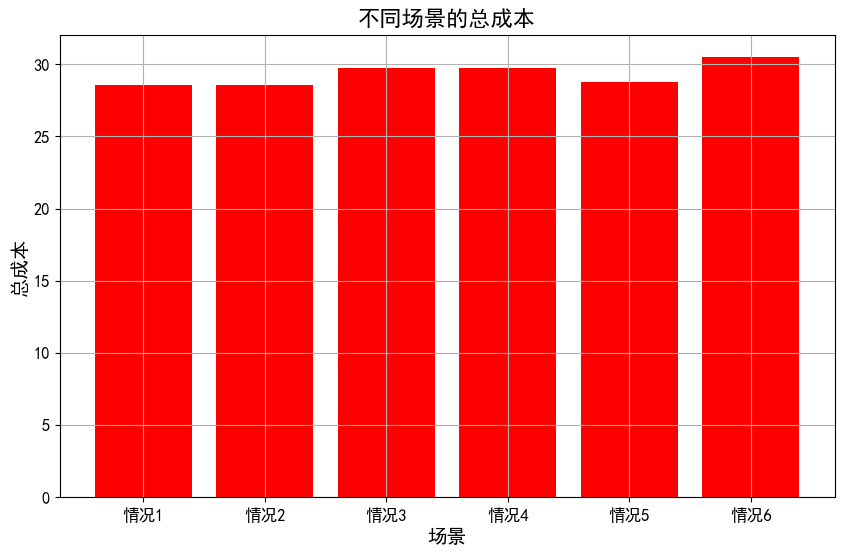

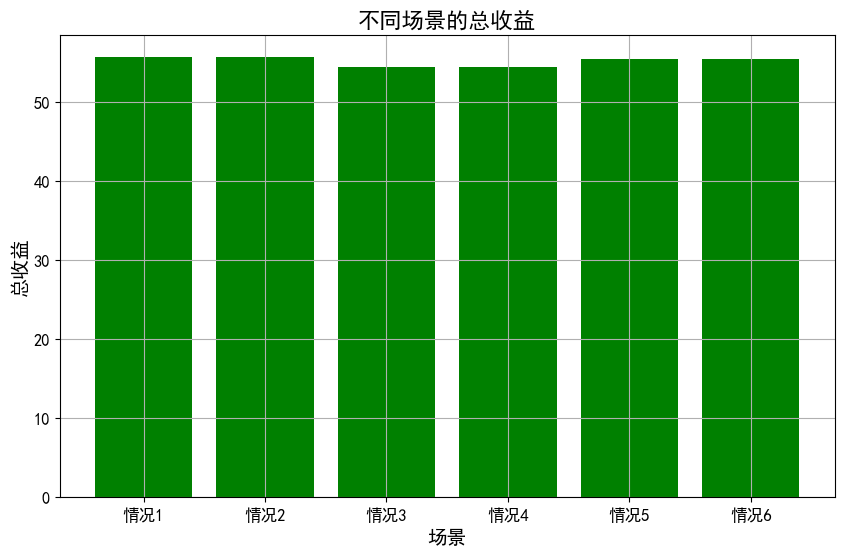

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# 场景名称
scenarios = ['情况1', '情况2', '情况3', '情况4', '情况5', '情况6']

# 数据分离
costs = [result[3] for result in results]
revenues = [result[4] for result in results]

# 绘制成本图表
plt.figure(figsize=(10, 6))
plt.bar(scenarios, costs, color='red')
plt.xlabel('场景', fontsize=14)
plt.ylabel('总成本', fontsize=14)
plt.title('不同场景的总成本', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# 绘制收益图表
plt.figure(figsize=(10, 6))
plt.bar(scenarios, revenues, color='green')
plt.xlabel('场景', fontsize=14)
plt.ylabel('总收益', fontsize=14)
plt.title('不同场景的总收益', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


In [4]:
import numpy as np

# 定义状态，按照零配件和半成品、成品编号
states = ['零配件1', '零配件2', '零配件3', '零配件4', '零配件5', '零配件6', '零配件7', '零配件8',
          '半成品1', '半成品2', '半成品3', '成品']

# 动作定义
actions = ['检测', '不检测', '装配', '销售', '拆解']

# 初始化奖励矩阵和状态转移概率矩阵
num_states = len(states)
num_actions = len(actions)
R = np.zeros((num_states, num_actions))
P = np.zeros((num_actions, num_states, num_states))

# 设置奖励矩阵和转移概率，使用新的缺陷率
power_reject = 0.150  # 对应零配件和半成品缺陷率
power_accept = 0.050  # 对应成品缺陷率

for i in range(8):  # 所有零配件的设置
    P[2, i, (i // 3) + 8] = 1 - power_reject  # 装配成功概率
    P[4, i, i] = power_reject  # 拆解失败概率
    R[i, :] = [-1, -2, 10, 0, -5]  # 检测、不检测、装配、销售、拆解的奖励/惩罚

for i in range(8, 11):  # 半成品到成品的转移
    P[3, i, 11] = 1 - power_accept  # 成品销售成功概率
    P[4, i, i] = power_accept  # 拆解失败概率
    R[i, :] = [-1, -2, 0, 50, -10]

# 成品销售奖励
R[11, :] = [0, 0, 0, 200, 0]  # 成品只有销售动作有意义

def value_iteration(P, R, gamma=0.95, epsilon=0.01):
    V = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    while True:
        V_prev = np.copy(V)
        for s in range(num_states):
            Q = np.zeros(num_actions)
            for a in range(num_actions):
                Q[a] = R[s, a] + gamma * sum([P[a, s, sp] * V[sp] for sp in range(num_states)])
            V[s] = np.max(Q)
            policy[s] = np.argmax(Q)
        if np.max(np.abs(V - V_prev)) < epsilon:
            break
    return policy, V

policy, V = value_iteration(P, R)
print("最优策略:", [actions[p] for p in policy])  # 输出具体的动作名称
print("状态值函数:", V)


最优策略: ['装配', '装配', '装配', '装配', '装配', '装配', '装配', '装配', '销售', '销售', '销售', '销售']
状态值函数: [196.12875 196.12875 196.12875 196.12875 196.12875 196.12875 196.12875
 196.12875 230.5     230.5     230.5     200.     ]


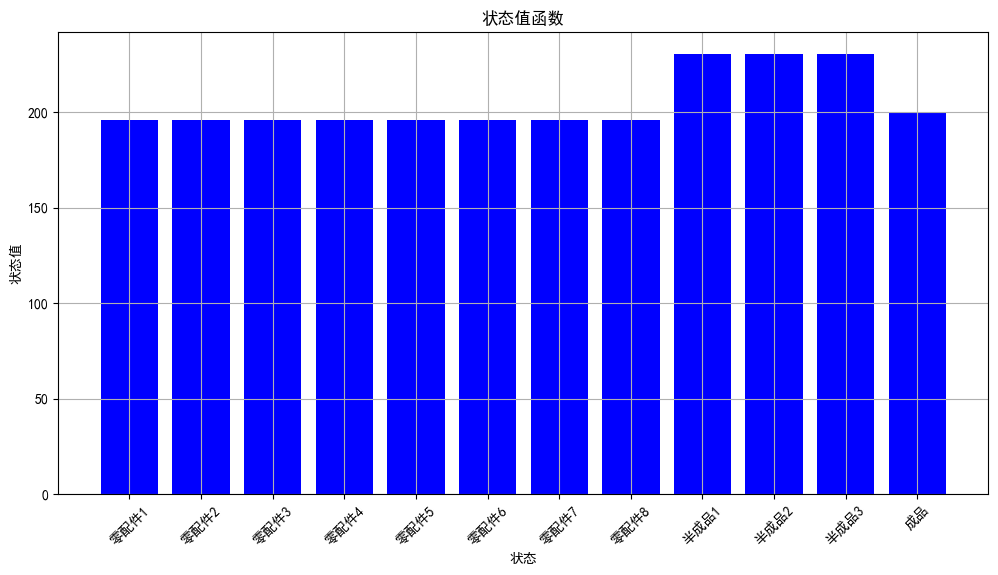

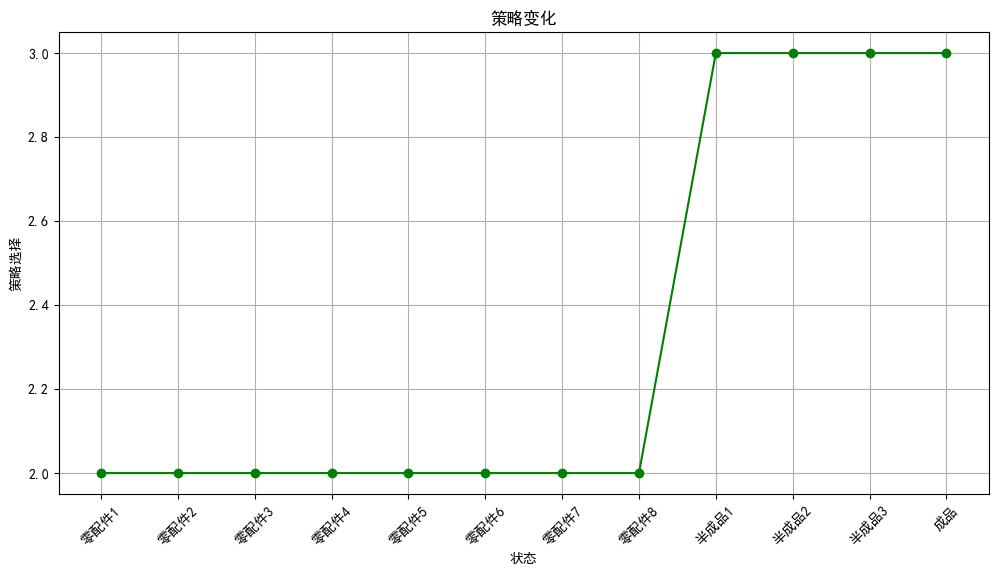

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# 绘制状态值函数
plt.figure(figsize=(12, 6))
plt.bar(states, V, color='blue')
plt.xlabel('状态')
plt.ylabel('状态值')
plt.title('状态值函数')
plt.xticks(rotation=45)  # 如果状态名称过长，可旋转以便显示
plt.grid(True)
plt.show()

# 绘制策略变化
plt.figure(figsize=(12, 6))
plt.plot(states, policy, 'o-', color='green')
plt.xlabel('状态')
plt.ylabel('策略选择')
plt.title('策略变化')
plt.xticks(rotation=45)  # 如果状态名称过长，可旋转以便显示
plt.grid(True)
plt.show()
